In [34]:
# Import the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [21]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25a7bd51a527570a451d2e3dc294cd2e


In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | harper
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | weligama
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | muzhi
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | batangafo
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ostrovnoy
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | banjar
Processing Record 18 of Set 1 | pasinler
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | port blair
Proc

Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | palmares
Processing Record 43 of Set 4 | karangampel
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | borovoy
Processing Record 46 of Set 4 | skjervoy
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | marzuq
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | beringovskiy
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | bjornevatn
Processing Record 3 of Set 5 | adilabad
Processing Record 4 of Set 5 | ust-omchug
Processing Record 5 of Set 5 | grand gaube
Processing Record 6 of Set 5 | moron
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | gawler
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | tonekabon
Processing Record 11 of Set 5 | ibra
Processing Record 12 of Set 5 | catamarca
Processing Record 13 of Set 5 | novo aripuana
Processing Record 14 of Set 5 | kimbe
Proces

Processing Record 31 of Set 8 | turayf
Processing Record 32 of Set 8 | athabasca
Processing Record 33 of Set 8 | andijon
Processing Record 34 of Set 8 | wallenhorst
Processing Record 35 of Set 8 | mvuma
Processing Record 36 of Set 8 | lincoln
Processing Record 37 of Set 8 | tasiilaq
Processing Record 38 of Set 8 | redmond
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 8 | mukhen
Processing Record 42 of Set 8 | gizo
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | mirnyy
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | le port
Processing Record 47 of Set 8 | verkhnevilyuysk
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | tarbes
Processing Record 50 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 1 of Set 9 | andevoranto
City not found. Skipping...
Processing Record 2 of Set 9 | batouri
P

Processing Record 20 of Set 12 | san vicente
Processing Record 21 of Set 12 | bundu
Processing Record 22 of Set 12 | lata
Processing Record 23 of Set 12 | paita
Processing Record 24 of Set 12 | ratnagiri
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | vestmannaeyjar
Processing Record 27 of Set 12 | simao
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | porto nacional
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | elko
Processing Record 32 of Set 12 | bela
Processing Record 33 of Set 12 | natal
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | broome
Processing Record 36 of Set 12 | port hardy
Processing Record 37 of Set 12 | teya
Processing Record 38 of Set 12 | hay river
Processing Record 39 of Set 12 | tala
Processing Record 40 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 41 of Set 12 | marcona
City not found. Skipping...
Processing Record 42 of Set 12 | garha

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.38,-7.72,84.92,81,96,5.32,LR,2020-02-23 14:39:30
1,Cherskiy,68.75,161.30,-25.83,92,65,6.22,RU,2020-02-23 14:39:31
2,San Patricio,19.22,-104.70,71.60,73,40,6.93,MX,2020-02-23 14:39:31
3,College,64.86,-147.80,-2.20,83,90,3.36,US,2020-02-23 14:39:32
4,Weligama,5.97,80.42,76.46,89,99,8.41,LK,2020-02-23 14:39:32
5,Carnarvon,-24.87,113.63,77.00,83,0,11.41,AU,2020-02-23 14:39:33
6,Barrow,71.29,-156.79,-23.80,74,20,10.29,US,2020-02-23 14:39:33
7,Muzhi,65.37,64.67,28.78,80,0,23.47,RU,2020-02-23 14:39:33
8,Lebu,-37.62,-73.65,68.83,59,2,7.16,CL,2020-02-23 14:39:34
9,Ushuaia,-54.80,-68.30,50.00,76,75,13.87,AR,2020-02-23 14:39:34


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2020-02-23 14:39:30,4.38,-7.72,84.92,81,96,5.32
1,Cherskiy,RU,2020-02-23 14:39:31,68.75,161.30,-25.83,92,65,6.22
2,San Patricio,MX,2020-02-23 14:39:31,19.22,-104.70,71.60,73,40,6.93
3,College,US,2020-02-23 14:39:32,64.86,-147.80,-2.20,83,90,3.36
4,Weligama,LK,2020-02-23 14:39:32,5.97,80.42,76.46,89,99,8.41


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

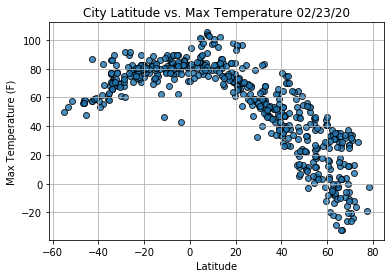

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

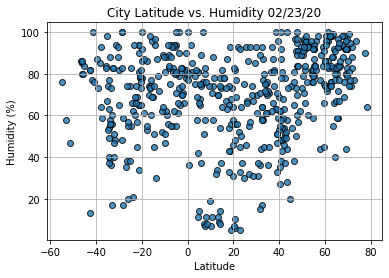

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

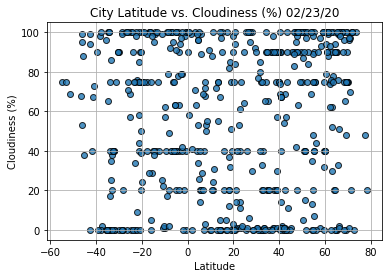

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

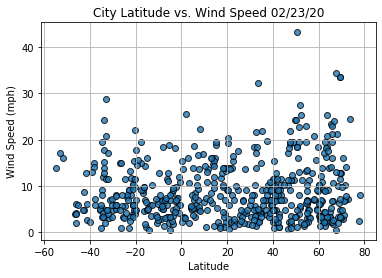

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                    Ostrovnoy
Country                        RU
Date          2020-02-23 14:39:36
Lat                         68.05
Lng                         39.51
Max Temp                     31.8
Humidity                       94
Cloudiness                    100
Wind Speed                   21.3
Name: 13, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2020-02-23 14:39:30,4.38,-7.72,84.92,81,96,5.32
1,Cherskiy,RU,2020-02-23 14:39:31,68.75,161.30,-25.83,92,65,6.22
2,San Patricio,MX,2020-02-23 14:39:31,19.22,-104.70,71.60,73,40,6.93
3,College,US,2020-02-23 14:39:32,64.86,-147.80,-2.20,83,90,3.36
4,Weligama,LK,2020-02-23 14:39:32,5.97,80.42,76.46,89,99,8.41
...,...,...,...,...,...,...,...,...,...
541,Port Hardy,CA,2020-02-23 14:43:40,50.70,-127.42,39.20,93,90,18.34
542,Teya,RU,2020-02-23 14:43:40,60.38,92.63,12.11,94,79,3.53
543,Hay River,CA,2020-02-23 14:43:40,60.82,-115.80,3.20,84,90,3.36
544,Tala,EG,2020-02-23 14:43:41,30.68,30.94,63.34,37,77,8.03


In [39]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2020-02-23 14:39:30,4.38,-7.72,84.92,81,96,5.32
1,Cherskiy,RU,2020-02-23 14:39:31,68.75,161.30,-25.83,92,65,6.22
2,San Patricio,MX,2020-02-23 14:39:31,19.22,-104.70,71.60,73,40,6.93
3,College,US,2020-02-23 14:39:32,64.86,-147.80,-2.20,83,90,3.36
4,Weligama,LK,2020-02-23 14:39:32,5.97,80.42,76.46,89,99,8.41
...,...,...,...,...,...,...,...,...,...
541,Port Hardy,CA,2020-02-23 14:43:40,50.70,-127.42,39.20,93,90,18.34
542,Teya,RU,2020-02-23 14:43:40,60.38,92.63,12.11,94,79,3.53
543,Hay River,CA,2020-02-23 14:43:40,60.82,-115.80,3.20,84,90,3.36
544,Tala,EG,2020-02-23 14:43:41,30.68,30.94,63.34,37,77,8.03


In [40]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Carnarvon,AU,2020-02-23 14:39:33,-24.87,113.63,77.00,83,0,11.41
8,Lebu,CL,2020-02-23 14:39:34,-37.62,-73.65,68.83,59,2,7.16
9,Ushuaia,AR,2020-02-23 14:39:34,-54.80,-68.30,50.00,76,75,13.87
12,Busselton,AU,2020-02-23 14:39:36,-33.65,115.33,72.00,36,86,17.81
15,Banjar,ID,2020-02-23 14:39:37,-8.19,114.97,84.20,83,20,5.82
...,...,...,...,...,...,...,...,...,...
525,San Vicente,AR,2020-02-23 14:43:33,-26.62,-54.13,77.00,74,100,1.01
528,Paita,PE,2020-02-23 14:43:34,-5.09,-81.11,62.60,100,40,8.05
533,Merauke,ID,2020-02-23 14:43:36,-8.47,140.33,77.05,94,100,5.77
534,Porto Nacional,BR,2020-02-23 14:43:37,-10.71,-48.42,87.33,64,22,3.36


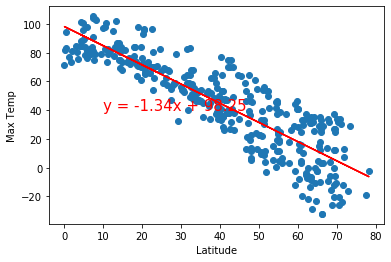

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

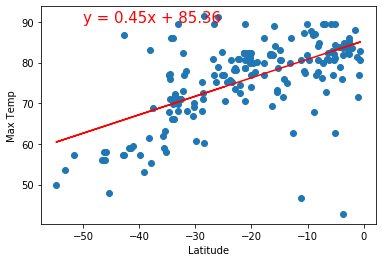

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

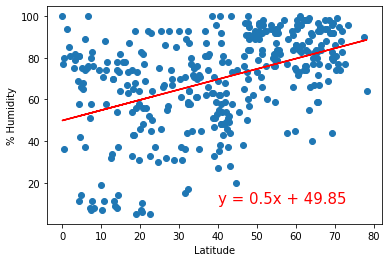

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

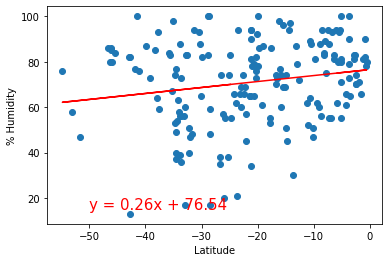

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

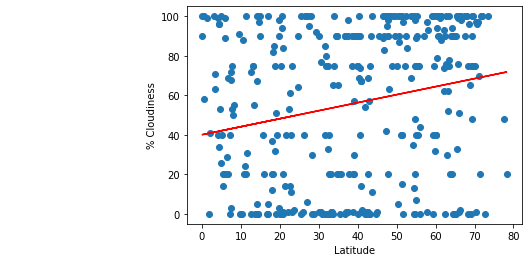

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

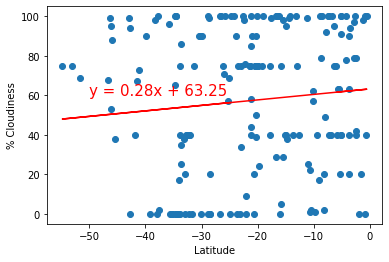

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

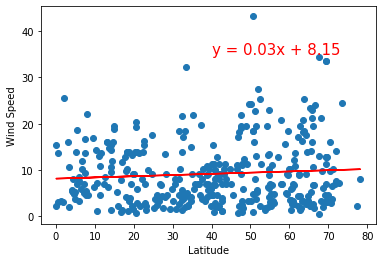

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

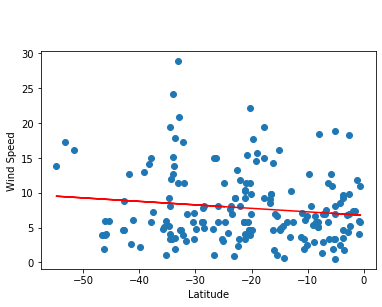

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))